In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
import pandas as pd
from preprocessing import load_if_in_country_or_lang
from preprocessing import categorize_views_for_df
from processing import filter_by_region_cat_code, build_regression_dataframe, load_preprocessed_events
from plot_regression import plot_regression_results_from_dict, plot_regression_results_interactions_from_dict, plot_cat_by_cat_variable
import numpy as np
from regression import likelihood_ratio_test_all, fit_nb_with_alpha_all_codes,transform_vars_for_regression, fit_nb_with_estimated_alpha, estimate_alpha, fit_nb, standardize_var, fit_nb_with_estimated_alpha_all_codes, standardize_var

In [3]:
df_crawled = pd.read_csv('events/new/processed_0_manually_with_wikiviews.csv').drop_duplicates()

In [4]:
from processing import calculate_uniqueness, calculate_uniqueness_two_columns

# how should uniqueness decay?
df_crawled.event_date = pd.to_datetime(df_crawled.event_date)
df_crawled = calculate_uniqueness(df_crawled, 30, 'country')
df_crawled = calculate_uniqueness(df_crawled, 30, 'cat')
df_crawled = calculate_uniqueness_two_columns(df_crawled, 30, 'country', 'cat')

In [7]:
df_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.event_date.dt.year >= 2016) & (df_crawled.views_7_sum > 10)].copy()
df_reg = transform_vars_for_regression(df_reg)

In [308]:
code_reg = 'C(code, Treatment(reference="en"))'
cat_reg = 'C(cat, Treatment(reference="sports"))'
class_reg = 'C(gni_class, Treatment(reference="H"))'
region_reg = 'C(gni_region, Treatment(reference="North America"))'
continent_reg = 'C(continent, Treatment(reference="North America"))'

#features_no_rq = [cat_reg, 'population_log', 'country_articles_log', 'cat_articles_log', 'country_cat_articles_log', 'views_baseline_log', 'view_country_article_log', 'planned', 'breaking']
features_no_rq = [cat_reg, 'population_log', 'country_articles_log', 'cat_articles_log', 'country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking']# 'view_country_article_log', 
features_no_red = [cat_reg, 'population_log','country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking']# 'view_country_article_log', 
features_no_bin = [cat_reg, 'population_log','country_cat_articles_log', 'views_baseline_log']# 'view_country_article_log', 

features_rq_1 = features_no_red + [class_reg]
features_rq_1a = features_no_red + ['GDP_pc_z']
features_rq_2 = features_no_red + [region_reg]
features_rq_2a = features_no_red + [continent_reg]
features_both = features_no_red + [class_reg, region_reg]

features_rq_1_nobin = features_no_bin + [class_reg]
features_rq_1a_nobin = features_no_red + ['GDP_pc_z']
features_rq_2_nobin = features_no_bin + [region_reg]
features_both_nobin = features_no_bin + [class_reg, region_reg]

In [112]:
codes = ['en', 'es', 'de', 'it']

In [181]:
alpha_dict = {}
fit_0 = fit_nb_with_estimated_alpha_all_codes(['en', 'es', 'de', 'it'], df_reg, f'views_7_sum ~ {"+".join(features_no_rq)}', 
    est_method='lbfgs', output_lvl=1, alpha_dict=alpha_dict)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 15.72 (p=0.0002)
Deviance: 1607.05 | Null-deviance: 1800.82 | Pseudo R² (1 - D/D_0) = 0.1076
Pseudo ChiSq: 7226.54 | Good-Fit-ChiSq: 6875.31 | Residual DF: 6684
AIC: 155046.91 | BIC: -57273.08
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.08
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 15.20 (p=0.0000)
Deviance: 616.12 | Null-deviance: 786.00 | Pseudo R² (1 - D/D_0) = 0.2161
Pseudo ChiSq: 2890.53 | Good-Fit-ChiSq: 2925.24 | Residual DF: 2801
AIC: 56203.17 | BIC: -21628.45
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.03
________________________________________________________________________________________________
================= Fitting de =========

In [309]:
alpha_dict = {}
fit_0 = fit_nb_with_estimated_alpha_all_codes(['en', 'es', 'de', 'it'], df_reg, f'views_7_sum ~ {"+".join(features_no_red)}', 
    est_method='lbfgs', output_lvl=1, alpha_dict=alpha_dict)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 15.79 (p=0.0002)
Deviance: 1604.76 | Null-deviance: 1792.53 | Pseudo R² (1 - D/D_0) = 0.1047
Pseudo ChiSq: 7202.61 | Good-Fit-ChiSq: 6877.34 | Residual DF: 6686
AIC: 155093.46 | BIC: -57292.99
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.08
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 15.52 (p=0.0000)
Deviance: 608.48 | Null-deviance: 769.62 | Pseudo R² (1 - D/D_0) = 0.2094
Pseudo ChiSq: 3012.16 | Good-Fit-ChiSq: 2927.28 | Residual DF: 2803
AIC: 56292.54 | BIC: -21651.97
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.07
________________________________________________________________________________________________
================= Fitting de =========

In [310]:
alpha_dict_nobin = {}
fit_0_nobin = fit_nb_with_estimated_alpha_all_codes(['en', 'es', 'de', 'it'], df_reg, f'views_7_sum ~ {"+".join(features_no_bin)}', 
    est_method='lbfgs', output_lvl=1, alpha_dict=alpha_dict_nobin)

________________________________________________________________________________________________
================= Fitting en =================
Estimated alpha as 16.57 (p=0.0003)
Deviance: 1598.05 | Null-deviance: 1708.45 | Pseudo R² (1 - D/D_0) = 0.0646
Pseudo ChiSq: 6660.20 | Good-Fit-ChiSq: 6879.37 | Residual DF: 6688
AIC: 155634.38 | BIC: -57317.32
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.00
________________________________________________________________________________________________
================= Fitting es =================
Estimated alpha as 18.74 (p=0.0003)
Deviance: 583.51 | Null-deviance: 637.26 | Pseudo R² (1 - D/D_0) = 0.0843
Pseudo ChiSq: 3341.37 | Good-Fit-ChiSq: 2929.33 | Residual DF: 2805
AIC: 57178.47 | BIC: -21692.82
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.19
________________________________________________________________________________________________
================= Fitting de =========

In [150]:
fit_rqred = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_no_red)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1612.18 | Null-deviance: 1800.82 | Pseudo R² (1 - D/D_0) = 0.1048
Pseudo ChiSq: 7235.48 | Good-Fit-ChiSq: 6877.34 | Residual DF: 6686
AIC: 155048.04 | BIC: -57285.57
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.08
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 621.41 | Null-deviance: 786.00 | Pseudo R² (1 - D/D_0) = 0.2094
Pseudo ChiSq: 3088.93 | Good-Fit-ChiSq: 2927.28 | Residual DF: 2803
AIC: 56204.46 | BIC: -21639.04
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.10
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1155.74 | Null-deviance: 1764.10 | Pseudo R² (1 - D/D

In [193]:
fit_rq1 = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_1)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1588.49 | Null-deviance: 1792.53 | Pseudo R² (1 - D/D_0) = 0.1138
Pseudo ChiSq: 6454.20 | Good-Fit-ChiSq: 6874.29 | Residual DF: 6683
AIC: 155083.18 | BIC: -57282.84
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.97
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 590.99 | Null-deviance: 769.62 | Pseudo R² (1 - D/D_0) = 0.2321
Pseudo ChiSq: 2490.04 | Good-Fit-ChiSq: 2924.22 | Residual DF: 2800
AIC: 56281.05 | BIC: -21645.63
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.89
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1075.22 | Null-deviance: 1665.47 | Pseudo R² (1 - D/D

In [298]:
fit_rq1a = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_1a)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1604.11 | Null-deviance: 1792.53 | Pseudo R² (1 - D/D_0) = 0.1051
Pseudo ChiSq: 7245.82 | Good-Fit-ChiSq: 6876.32 | Residual DF: 6685
AIC: 155094.81 | BIC: -57284.83
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.08
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 599.21 | Null-deviance: 769.62 | Pseudo R² (1 - D/D_0) = 0.2214
Pseudo ChiSq: 2751.37 | Good-Fit-ChiSq: 2926.26 | Residual DF: 2802
AIC: 56285.27 | BIC: -21653.30
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.98
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1090.03 | Null-deviance: 1665.47 | Pseudo R² (1 - D/D

In [194]:
fit_rq2 = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_2)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1594.06 | Null-deviance: 1792.53 | Pseudo R² (1 - D/D_0) = 0.1107
Pseudo ChiSq: 7336.17 | Good-Fit-ChiSq: 6871.25 | Residual DF: 6680
AIC: 155094.75 | BIC: -57250.84
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.10
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 577.12 | Null-deviance: 769.62 | Pseudo R² (1 - D/D_0) = 0.2501
Pseudo ChiSq: 2699.36 | Good-Fit-ChiSq: 2921.15 | Residual DF: 2797
AIC: 56273.18 | BIC: -21635.68
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.97
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1060.22 | Null-deviance: 1665.47 | Pseudo R² (1 - D/D

In [195]:
fit_rq2a = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_2a)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1596.53 | Null-deviance: 1792.53 | Pseudo R² (1 - D/D_0) = 0.1093
Pseudo ChiSq: 7715.34 | Good-Fit-ChiSq: 6872.27 | Residual DF: 6681
AIC: 155095.23 | BIC: -57257.18
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.15
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 577.10 | Null-deviance: 769.62 | Pseudo R² (1 - D/D_0) = 0.2502
Pseudo ChiSq: 2752.59 | Good-Fit-ChiSq: 2922.17 | Residual DF: 2798
AIC: 56271.16 | BIC: -21643.64
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.98
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1072.62 | Null-deviance: 1665.47 | Pseudo R² (1 - D/D

In [196]:
fit_both = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_both)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1586.40 | Null-deviance: 1792.53 | Pseudo R² (1 - D/D_0) = 0.1150
Pseudo ChiSq: 6552.42 | Good-Fit-ChiSq: 6868.21 | Residual DF: 6677
AIC: 155093.10 | BIC: -57232.07
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.98
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 576.75 | Null-deviance: 769.62 | Pseudo R² (1 - D/D_0) = 0.2506
Pseudo ChiSq: 2649.94 | Good-Fit-ChiSq: 2918.08 | Residual DF: 2794
AIC: 56278.81 | BIC: -21612.23
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.95
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1050.61 | Null-deviance: 1665.47 | Pseudo R² (1 - D/D

In [311]:
fit_rq1_nobin = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_1_nobin)})', alpha_dict_nobin, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1586.86 | Null-deviance: 1708.45 | Pseudo R² (1 - D/D_0) = 0.0712
Pseudo ChiSq: 6242.34 | Good-Fit-ChiSq: 6876.32 | Residual DF: 6685
AIC: 155629.18 | BIC: -57302.09
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.93
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 569.82 | Null-deviance: 637.26 | Pseudo R² (1 - D/D_0) = 0.1058
Pseudo ChiSq: 2780.68 | Good-Fit-ChiSq: 2926.26 | Residual DF: 2802
AIC: 57170.78 | BIC: -21682.69
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.99
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1213.90 | Null-deviance: 1462.00 | Pseudo R² (1 - D/D

In [312]:
fit_rq1a_nobin = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_1a_nobin)})', alpha_dict_nobin, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1529.46 | Null-deviance: 1708.45 | Pseudo R² (1 - D/D_0) = 0.1048
Pseudo ChiSq: 6858.24 | Good-Fit-ChiSq: 6876.32 | Residual DF: 6685
AIC: 155571.78 | BIC: -57359.49
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.03
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 500.24 | Null-deviance: 637.26 | Pseudo R² (1 - D/D_0) = 0.2150
Pseudo ChiSq: 2213.04 | Good-Fit-ChiSq: 2926.26 | Residual DF: 2802
AIC: 57101.20 | BIC: -21752.27
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.79
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 957.44 | Null-deviance: 1462.00 | Pseudo R² (1 - D/D_

In [270]:
fit_rq2_nobin = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_2_nobin)})', alpha_dict, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1587.02 | Null-deviance: 1708.45 | Pseudo R² (1 - D/D_0) = 0.0711
Pseudo ChiSq: 6898.05 | Good-Fit-ChiSq: 6873.28 | Residual DF: 6682
AIC: 155635.35 | BIC: -57275.49
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.03
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 554.89 | Null-deviance: 637.26 | Pseudo R² (1 - D/D_0) = 0.1293
Pseudo ChiSq: 2866.68 | Good-Fit-ChiSq: 2923.19 | Residual DF: 2799
AIC: 57161.85 | BIC: -21673.79
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.02
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1194.67 | Null-deviance: 1462.00 | Pseudo R² (1 - D/D

In [313]:
fit_rq2a_nobin = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_rq_2a_nobin)})', alpha_dict_nobin, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1590.13 | Null-deviance: 1708.45 | Pseudo R² (1 - D/D_0) = 0.0693
Pseudo ChiSq: 7344.30 | Good-Fit-ChiSq: 6874.29 | Residual DF: 6683
AIC: 155636.45 | BIC: -57281.20
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.10
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 555.60 | Null-deviance: 637.26 | Pseudo R² (1 - D/D_0) = 0.1281
Pseudo ChiSq: 2887.02 | Good-Fit-ChiSq: 2924.22 | Residual DF: 2800
AIC: 57160.56 | BIC: -21681.02
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.03
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1195.54 | Null-deviance: 1462.00 | Pseudo R² (1 - D/D

In [314]:
fit_both_nobin = fit_nb_with_alpha_all_codes(codes, df_reg, f'views_7_sum ~ ({"+".join(features_both_nobin)})', alpha_dict_nobin, output_lvl=1)

________________________________________________________________________________________________
================= Fitting en =================
Deviance: 1578.93 | Null-deviance: 1708.45 | Pseudo R² (1 - D/D_0) = 0.0758
Pseudo ChiSq: 6276.73 | Good-Fit-ChiSq: 6870.24 | Residual DF: 6679
AIC: 155633.25 | BIC: -57257.16
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 0.94
________________________________________________________________________________________________
================= Fitting es =================
Deviance: 554.15 | Null-deviance: 637.26 | Pseudo R² (1 - D/D_0) = 0.1304
Pseudo ChiSq: 2801.37 | Good-Fit-ChiSq: 2920.13 | Residual DF: 2796
AIC: 57167.11 | BIC: -21650.71
H0 = Model provides adequate fit for data: p=1.00
Overdispersion factor: 1.00
________________________________________________________________________________________________
================= Fitting de =================
Deviance: 1186.03 | Null-deviance: 1462.00 | Pseudo R² (1 - D/D

In [315]:
likelihood_ratio_test_all(fit_0, fit_rq1, correct=None) # control vs. income

{'en': {'lambda_lr': 16.28, 'delta_df': 3, 'p_val': 0.001},
 'es': {'lambda_lr': 17.48, 'delta_df': 3, 'p_val': 0.001},
 'de': {'lambda_lr': 15.92, 'delta_df': 3, 'p_val': 0.001},
 'it': {'lambda_lr': 5.71, 'delta_df': 3, 'p_val': 0.127}}

In [316]:
likelihood_ratio_test_all(fit_0, fit_rq1a, correct=None) # control vs. gdp

{'en': {'lambda_lr': 0.65, 'delta_df': 1, 'p_val': 0.42},
 'es': {'lambda_lr': 9.27, 'delta_df': 1, 'p_val': 0.002},
 'de': {'lambda_lr': 1.1, 'delta_df': 1, 'p_val': 0.294},
 'it': {'lambda_lr': 2.45, 'delta_df': 1, 'p_val': 0.118}}

In [317]:
likelihood_ratio_test_all(fit_0, fit_rq2) # control vs. region level

{'en': {'lambda_lr': 10.71, 'delta_df': 6, 'p_val': 0.098},
 'es': {'lambda_lr': 31.35, 'delta_df': 6, 'p_val': 0.0},
 'de': {'lambda_lr': 30.91, 'delta_df': 6, 'p_val': 0.0},
 'it': {'lambda_lr': 6.4, 'delta_df': 6, 'p_val': 0.38}}

In [318]:
likelihood_ratio_test_all(fit_0, fit_rq2a) # control vs. continent level

{'en': {'lambda_lr': 8.24, 'delta_df': 5, 'p_val': 0.144},
 'es': {'lambda_lr': 31.38, 'delta_df': 5, 'p_val': 0.0},
 'de': {'lambda_lr': 18.51, 'delta_df': 5, 'p_val': 0.002},
 'it': {'lambda_lr': 2.96, 'delta_df': 5, 'p_val': 0.707}}

In [319]:
likelihood_ratio_test_all(fit_0, fit_rqred) # feature reduction

{'en': {'lambda_lr': 45.42, 'delta_df': 0, 'p_val': nan},
 'es': {'lambda_lr': 88.07, 'delta_df': 0, 'p_val': nan},
 'de': {'lambda_lr': 74.45, 'delta_df': 0, 'p_val': nan},
 'it': {'lambda_lr': 82.59, 'delta_df': 0, 'p_val': nan}}

In [320]:
likelihood_ratio_test_all(fit_rq1, fit_both) # class vs. class+region

{'en': {'lambda_lr': 2.09, 'delta_df': 6, 'p_val': 0.912},
 'es': {'lambda_lr': 14.25, 'delta_df': 6, 'p_val': 0.027},
 'de': {'lambda_lr': 24.6, 'delta_df': 6, 'p_val': 0.0},
 'it': {'lambda_lr': 9.12, 'delta_df': 6, 'p_val': 0.167}}

In [321]:
likelihood_ratio_test_all(fit_rq2, fit_both) # region vs. class+region

{'en': {'lambda_lr': 7.66, 'delta_df': 3, 'p_val': 0.054},
 'es': {'lambda_lr': 0.38, 'delta_df': 3, 'p_val': 0.945},
 'de': {'lambda_lr': 9.61, 'delta_df': 3, 'p_val': 0.022},
 'it': {'lambda_lr': 8.43, 'delta_df': 3, 'p_val': 0.038}}

In [ ]:
likelihood_ratio_test_all(fit_0_nobin, fit_rq1_nobin, correct=None) # control vs. income

In [322]:
display('control vs. income')
display(likelihood_ratio_test_all(fit_0_nobin, fit_rq1_nobin, correct=None)) # control vs. income
display('control vs. region')
display(likelihood_ratio_test_all(fit_0_nobin, fit_rq2_nobin, correct=None)) # control vs. region
display('income vs. both')
display(likelihood_ratio_test_all(fit_rq1_nobin, fit_both_nobin, correct=None)) # income vs. both
display('region vs. both')
display(likelihood_ratio_test_all(fit_rq2_nobin, fit_both_nobin, correct=None)) # region vs. both

'control vs. income'

{'en': {'lambda_lr': 11.2, 'delta_df': 3, 'p_val': 0.011},
 'es': {'lambda_lr': 13.69, 'delta_df': 3, 'p_val': 0.003},
 'de': {'lambda_lr': 11.28, 'delta_df': 3, 'p_val': 0.01},
 'it': {'lambda_lr': 6.43, 'delta_df': 3, 'p_val': 0.092}}

'control vs. region'

{'en': {'lambda_lr': 11.03, 'delta_df': 6, 'p_val': 0.087},
 'es': {'lambda_lr': 28.63, 'delta_df': 6, 'p_val': 0.0},
 'de': {'lambda_lr': 30.51, 'delta_df': 6, 'p_val': 0.0},
 'it': {'lambda_lr': 8.89, 'delta_df': 6, 'p_val': 0.18}}

'income vs. both'

{'en': {'lambda_lr': 7.93, 'delta_df': 6, 'p_val': 0.243},
 'es': {'lambda_lr': 15.67, 'delta_df': 6, 'p_val': 0.016},
 'de': {'lambda_lr': 27.87, 'delta_df': 6, 'p_val': 0.0},
 'it': {'lambda_lr': 12.62, 'delta_df': 6, 'p_val': 0.05}}

'region vs. both'

{'en': {'lambda_lr': 8.1, 'delta_df': 3, 'p_val': 0.044},
 'es': {'lambda_lr': 0.74, 'delta_df': 3, 'p_val': 0.865},
 'de': {'lambda_lr': 8.64, 'delta_df': 3, 'p_val': 0.035},
 'it': {'lambda_lr': 10.16, 'delta_df': 3, 'p_val': 0.017}}

### Visualization

In [ ]:
features_no_red = [cat_reg, 'population_log','country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking']# 'view_country_article_log', 

features_rq_1 = features_no_red + [class_reg]
features_rq_2 = features_no_red + [region_reg]
features_rq_2a = features_no_red + [continent_reg]
features_both = features_no_red + [class_reg, region_reg]

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking


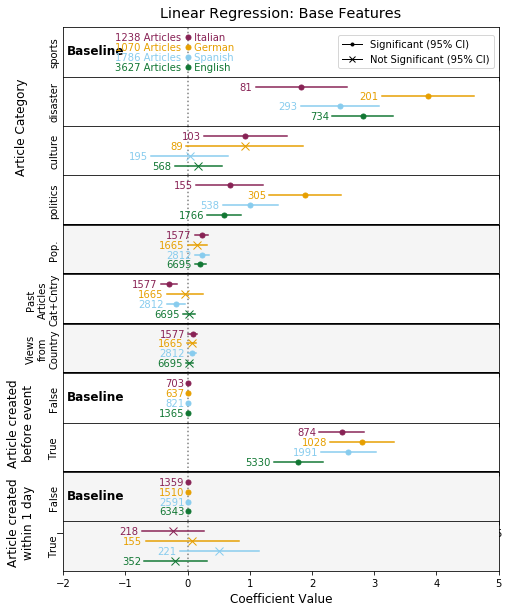

In [292]:
#coefficients = [string.strip() for string in features_no_red.split('+')]
print(" + ".join(features_no_red).replace('_', '\_'))

figres0 = plot_regression_results_from_dict(
    df_reg, fit_0, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking'], 
    include_counts=True, figsize=(7.8, 10), x_limits=(-2,5), title=f'Linear Regression: Base Features', adjust_overdispersion=True)
figres0.savefig('figures/reg_model0.pdf', bbox_inches='tight')

In [330]:
alpha_dict

{'en': 15.793232263397778,
 'es': 15.518630955214343,
 'de': 4.723620300288376,
 'it': 7.67024508929904}

In [331]:
alpha_dict['en']

15.793232263397778

In [334]:
0.19326 / np.sqrt(1.08)

0.18596452170597844

In [329]:
fit_rq1['en'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            views_7_sum   No. Observations:                 6695
Model:                            GLM   Df Residuals:                     6683
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77530.
Date:                Wed, 25 May 2022   Deviance:                       1588.5
Time:                        11:51:54   Pearson chi2:                 6.45e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.1537      0.560      7.412      0.000       3.055       5.252
cat[T.culture]               0.1325      0.187      0.709      0.478      -0.234       0.499
cat[T.disaster]              2.8138      0.223     12.640      0.000       2.377       3.250
cat[T.politics]              0.5140      0.130      3.947      0.000       0.259       0.769
planned[T.True]              1.8458      0.175     10.543      0.000       1.503       2.189
breaking[T.True]            -0.3206      0.246     -1.302      0.193      -0.803       0.162
gni_class[T.L]               1.4411      0.416      3.464      0.001       0.626       2.256
gni_class[T.LM]              0.1733      0.214      0.809      0.418      -0.246       0.593
gni_class[T.UM]              0.5564      0.175      3.183      0.001       0.214       0.899
population_log               0.0790      0.055      1.438      0.150      -0.029       0.187
country_cat_articles_log    -0.0092      0.051     -0.181      0.857      -0.109       0.090
views_baseline_log           0.1474      0.045      3.311      0.001       0.060       0.235
============================================================================================
"""

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + C(gni\_class, Treatment(reference="H"))


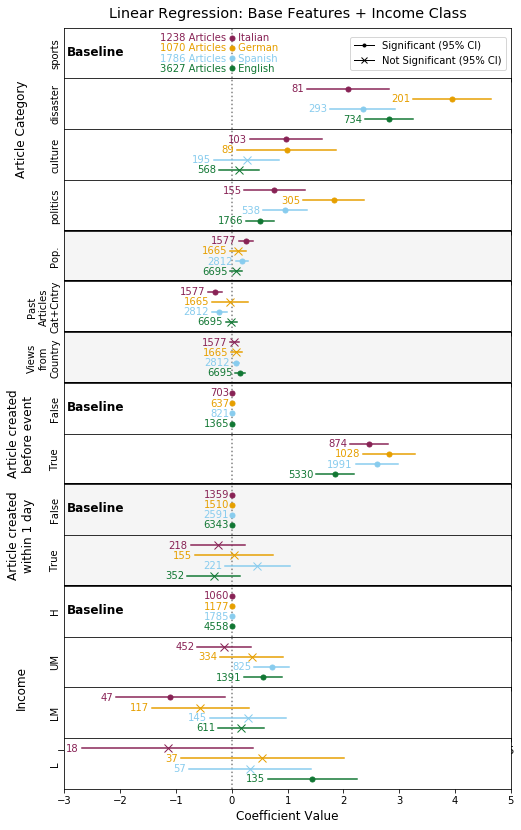

In [293]:
print(" + ".join(features_rq_1).replace('_', '\_'))

figres1 = plot_regression_results_from_dict(
    df_reg, fit_rq1, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking', 'gni_class'], 
    include_counts=True, figsize=(8, 14), x_limits=(-3,5), title=f'Linear Regression: Base Features + Income Class',
    adjust_overdispersion=True)
figres1.savefig('figures/reg_model1.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + GDP\_pc\_log


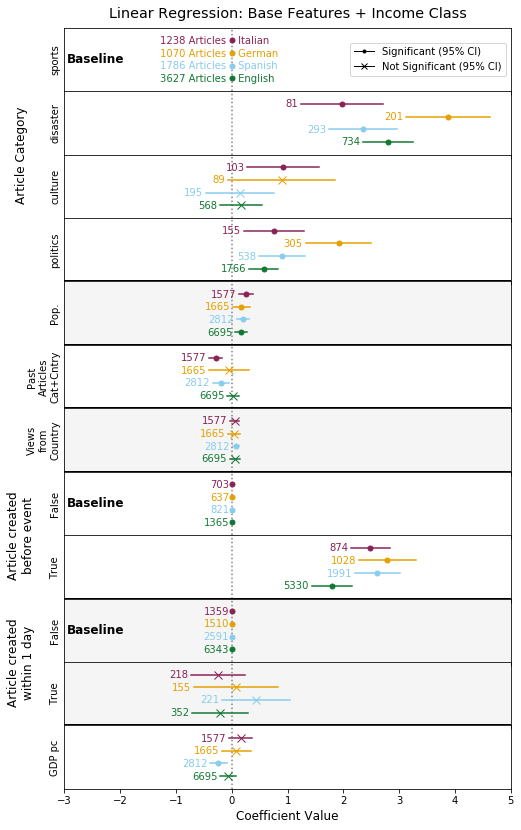

In [302]:
print(" + ".join(features_rq_1a).replace('_', '\_'))

figres1a = plot_regression_results_from_dict(
    df_reg, fit_rq1a, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking', 'GDP_pc_log'], 
    include_counts=True, figsize=(8, 14), x_limits=(-3,5), title=f'Linear Regression: Base Features + Income Class',
    adjust_overdispersion=True)
figres1a.savefig('figures/reg_model1a.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + C(gni\_region, Treatment(reference="North America"))


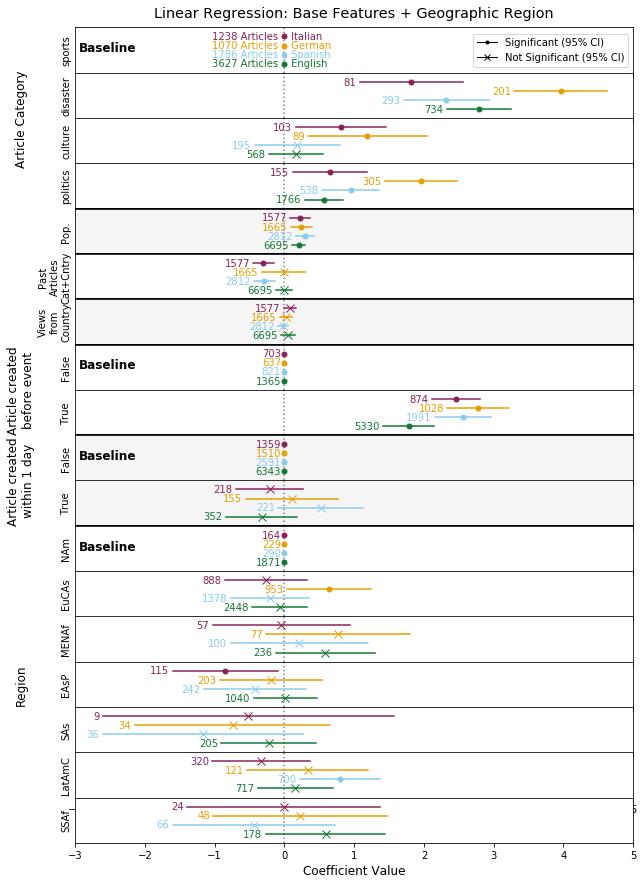

In [294]:
print(" + ".join(features_rq_2).replace('_', '\_'))

figres2 = plot_regression_results_from_dict(
    df_reg, fit_rq2, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking', 'gni_region'], 
    include_counts=True, figsize=(10, 15), x_limits=(-3,5), title=f'Linear Regression: Base Features + Geographic Region', adjust_overdispersion=True)
figres2.savefig('figures/reg_model2.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + C(gni\_class, Treatment(reference="H")) + C(gni\_region, Treatment(reference="North America"))


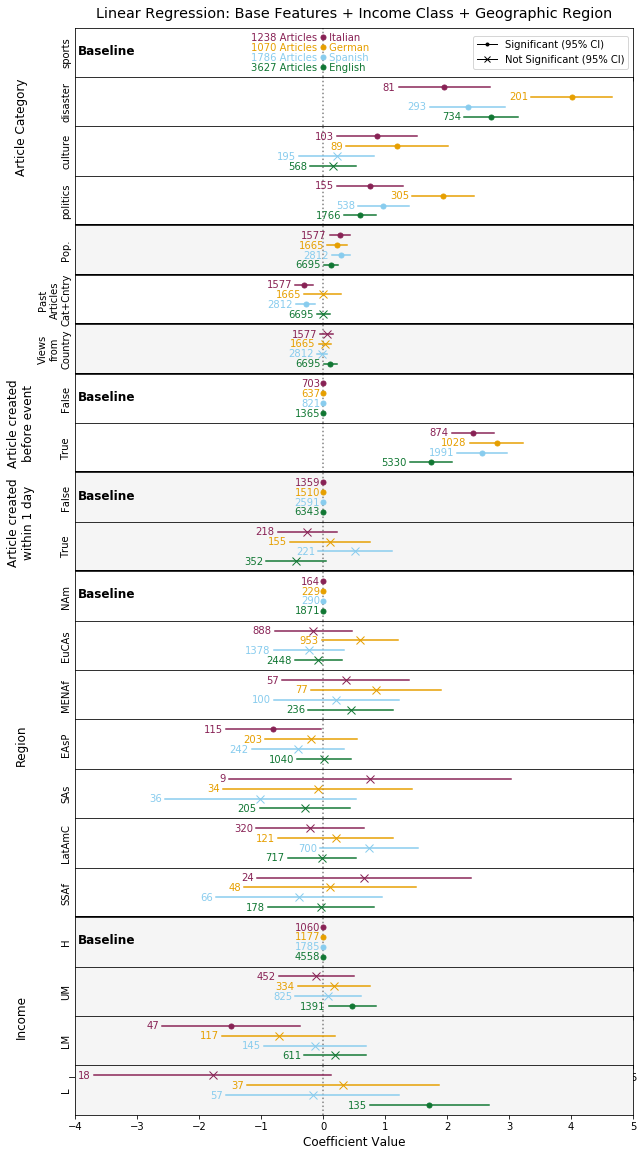

In [295]:
print(" + ".join(features_both).replace('_', '\_'))

figres_both = plot_regression_results_from_dict(
    df_reg, fit_both, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'planned', 'breaking', 'gni_region', 'gni_class'], 
    include_counts=True, figsize=(10, 20), x_limits=(-4,5), title=f'Linear Regression: Base Features + Income Class + Geographic Region', adjust_overdispersion=True)
figres_both.savefig('figures/reg_model_both.pdf', bbox_inches='tight')

## no planned/breaking

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking


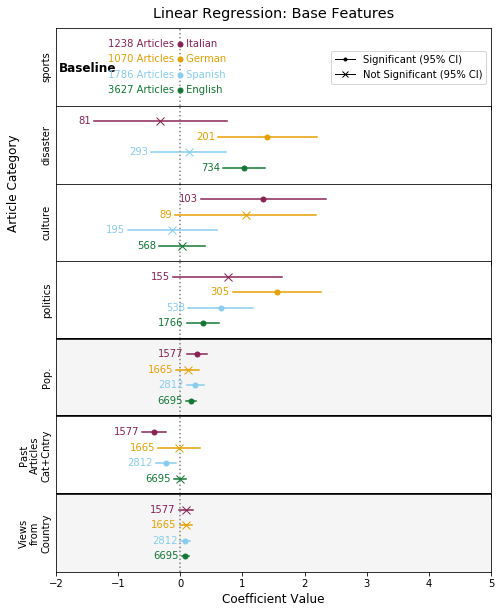

In [291]:
#coefficients = [string.strip() for string in features_no_red.split('+')]
print(" + ".join(features_no_red).replace('_', '\_'))

figres0_nobin = plot_regression_results_from_dict(
    df_reg, fit_0_nobin, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log'], 
    include_counts=True, figsize=(7.8, 10), x_limits=(-2,5), title=f'Linear Regression: Base Features', adjust_overdispersion=True)
figres0_nobin.savefig('figures/reg_model0_nobin.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + C(gni\_class, Treatment(reference="H"))


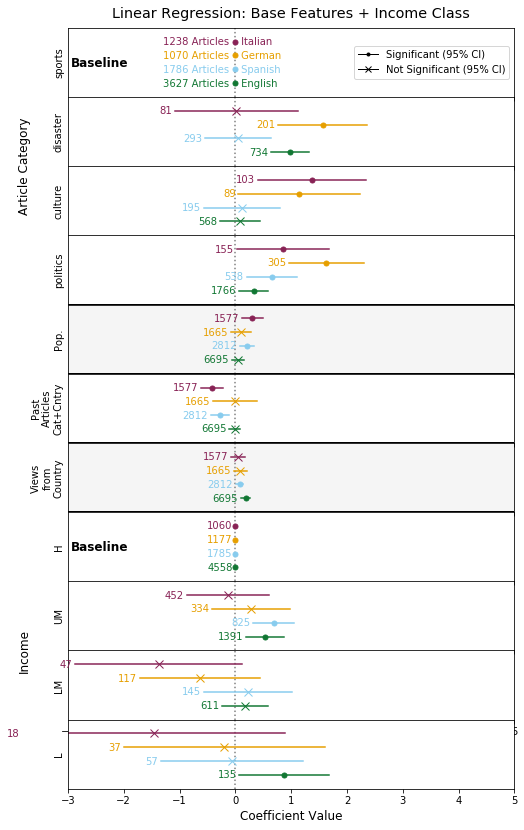

In [323]:
print(" + ".join(features_rq_1).replace('_', '\_'))

figres1_nobin = plot_regression_results_from_dict(
    df_reg, fit_rq1_nobin, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'gni_class'], 
    include_counts=True, figsize=(8, 14), x_limits=(-3,5), title=f'Linear Regression: Base Features + Income Class',
    adjust_overdispersion=True)
figres1_nobin.savefig('figures/reg_model1_nobin.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + GDP\_pc\_z


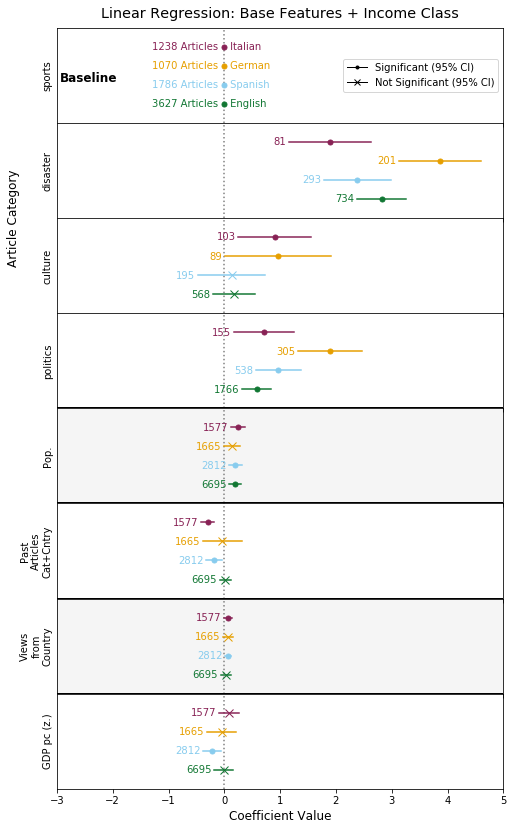

In [325]:
print(" + ".join(features_rq_1a_nobin).replace('_', '\_'))

figres1a_nobin = plot_regression_results_from_dict(
    df_reg, fit_rq1a_nobin, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'GDP_pc_z'], 
    include_counts=True, figsize=(8, 14), x_limits=(-3,5), title=f'Linear Regression: Base Features + Income Class',
    adjust_overdispersion=True)
figres1a_nobin.savefig('figures/reg_model1a_nobin.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + C(gni\_region, Treatment(reference="North America"))


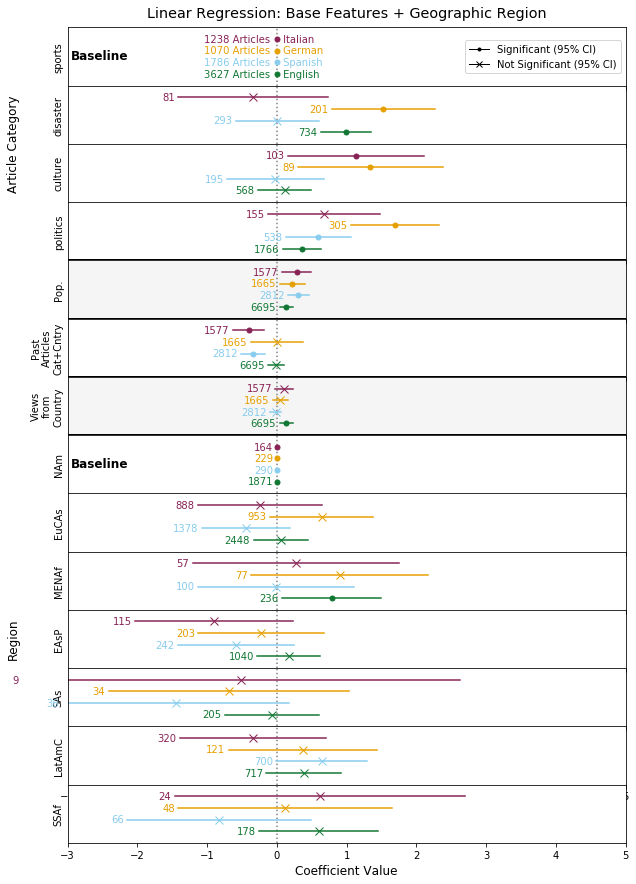

In [326]:
print(" + ".join(features_rq_2).replace('_', '\_'))

figres2_nobin = plot_regression_results_from_dict(
    df_reg, fit_rq2_nobin, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'gni_region'], 
    include_counts=True, figsize=(10, 15), x_limits=(-3,5), title=f'Linear Regression: Base Features + Geographic Region', adjust_overdispersion=True)
figres2_nobin.savefig('figures/reg_model2_nobin.pdf', bbox_inches='tight')

C(cat, Treatment(reference="sports")) + population\_log + country\_cat\_articles\_log + views\_baseline\_log + planned + breaking + C(gni\_class, Treatment(reference="H")) + C(gni\_region, Treatment(reference="North America"))


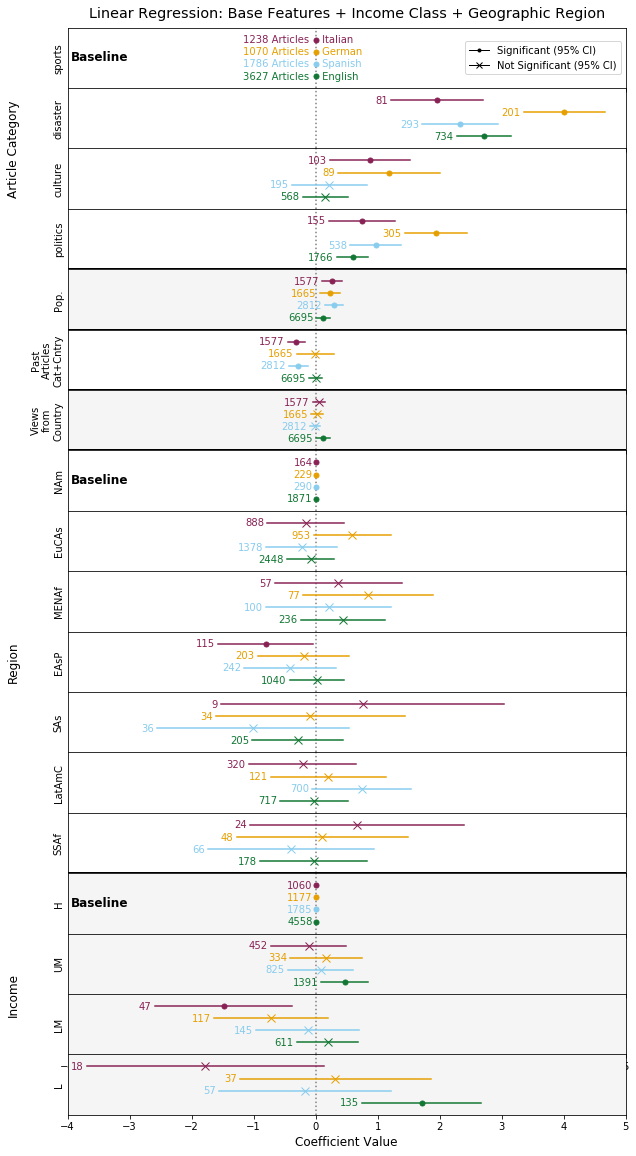

In [327]:
print(" + ".join(features_both).replace('_', '\_'))

figres_both_nobin = plot_regression_results_from_dict(
    df_reg, fit_both, 
    ['cat', 'population_log', 'country_cat_articles_log', 'views_baseline_log', 'gni_region', 'gni_class'], 
    include_counts=True, figsize=(10, 20), x_limits=(-4,5), title=f'Linear Regression: Base Features + Income Class + Geographic Region', adjust_overdispersion=True)
figres_both_nobin.savefig('figures/reg_model_both_nobin.pdf', bbox_inches='tight')